In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import *
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
(X_train,_), (_,_) = mnist.load_data()

In [4]:
print(X_train.shape)

(60000, 28, 28)


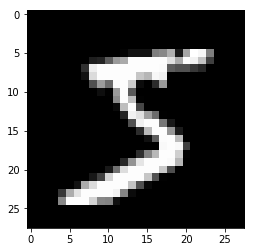

In [5]:
plt.imshow(X_train[0], cmap='gray')
plt.show()

In [6]:
## NORMALIZING THE DATA [-1,1]

X_train = (X_train.astype('float32') - 127.5)/127.5   # 127.5 is the middlmost val for any pixel...0 to 255
print(np.min(X_train))
print(np.max(X_train))

X_train = X_train.reshape(-1,784)
print(X_train.shape)

-1.0
1.0
(60000, 784)


In [7]:
TOTAL_EPOCHS = 50
BATCH_SIZE = 256
NO_OF_BATCHES = int(X_train.shape[0]/BATCH_SIZE)  ## no of batches/mini batches in each epoch in discriminator
HALF_BATCH = 128                                  ## 128 from each sample..real and fake
NOISE_DIM = 100                                   ## Upsampled to 784 dims later(28x28 img)
adam = Adam(lr=2e-4, beta_1=0.5)                  ## for GANs these params are best

# Generator

In [8]:
## INPUT NOISE (100 DIM) AND OUPUT VECTOR(784 DIM)

generator = Sequential()
generator.add(Dense(256, input_shape=(NOISE_DIM, )))  ## upscaled to 256 dims
generator.add(LeakyReLU(0.2))                         ## activation
generator.add(Dense(512))                             ## upscaled to 512 dims
generator.add(LeakyReLU(0.2))
generator.add(Dense(1024))                            ## upscaled to 1024 dims
generator.add(LeakyReLU(0.2))
generator.add(Dense(784, activation='tanh'))          ## downscaling

generator.compile(loss='binary_crossentropy', optimizer=adam)
generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               25856     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 784)               8

# Discriminator

In [9]:
## Downsampling

discriminator = Sequential()
discriminator.add(Dense(512, input_shape=(784,)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(1, activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy', optimizer=adam)
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_________________________________________________________________


# The GAN

In [10]:
def save_imgs(epochs,samples=100):
    
    noise = np.random.normal(0,1,size=(samples,NOISE_DIM))
    gen_imgs = generator.predict(noise)
    gen_imgs = gen_imgs.reshape(samples,28,28)
    
    plt.figure(figsize=(10,10))
    for i in range(samples):
        
        plt.subplot(10,10,i+1)
        plt.imshow(gen_imgs[i], interpolation='nearest', cmap='gray')
        plt.axis("off")
        
    plt.tight_layout()
    plt.savefig('./images/gan_output{0}.png'.format(epoch+1))
    plt.show()

In [11]:
discriminator.trainable = False                     ## Discriminator is frozen : Step-2
gan_input = Input(shape=(NOISE_DIM,))
generated_img = generator(gan_input)
gan_output = discriminator(generated_img)

## FUNCTIONAL API
model = Model(gan_input,gan_output)
model.compile(loss='binary_crossentropy', optimizer=adam)

Epoch1 :: Disc Loss 0.6514 -- Gen Loss 0.9534
Epoch2 :: Disc Loss 0.6437 -- Gen Loss 1.0188
Epoch3 :: Disc Loss 0.6349 -- Gen Loss 1.1132
Epoch4 :: Disc Loss 0.6212 -- Gen Loss 1.1471
Epoch5 :: Disc Loss 0.6167 -- Gen Loss 1.1543


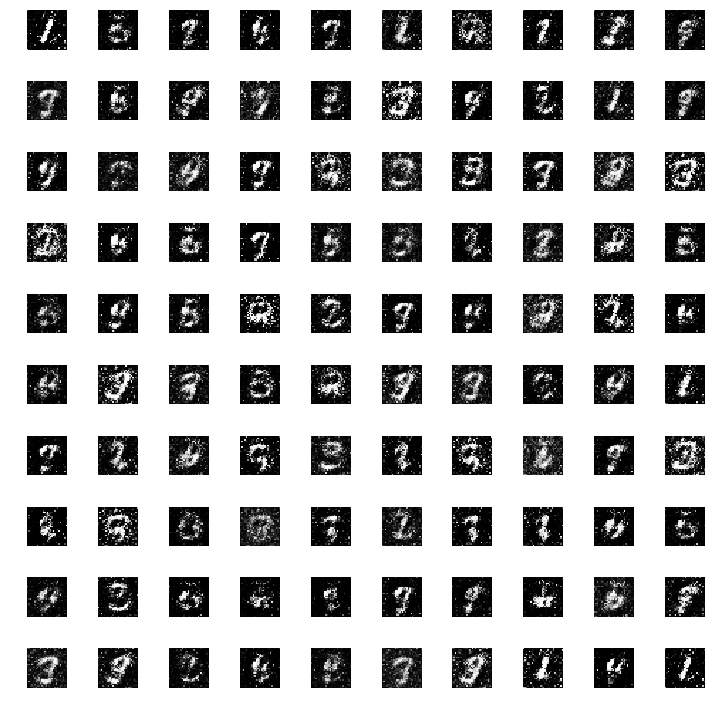

Epoch6 :: Disc Loss 0.5887 -- Gen Loss 1.2385
Epoch7 :: Disc Loss 0.5880 -- Gen Loss 1.2440
Epoch8 :: Disc Loss 0.5956 -- Gen Loss 1.2023
Epoch9 :: Disc Loss 0.6120 -- Gen Loss 1.1543
Epoch10 :: Disc Loss 0.6318 -- Gen Loss 1.0605


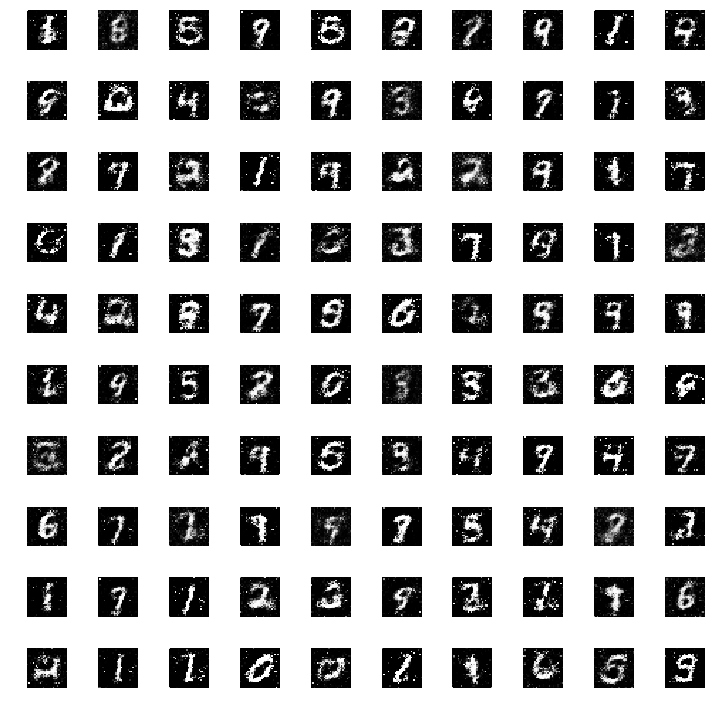

Epoch11 :: Disc Loss 0.6382 -- Gen Loss 1.0442
Epoch12 :: Disc Loss 0.6456 -- Gen Loss 1.0253
Epoch13 :: Disc Loss 0.6474 -- Gen Loss 1.0145
Epoch14 :: Disc Loss 0.6535 -- Gen Loss 0.9977
Epoch15 :: Disc Loss 0.6510 -- Gen Loss 1.0048


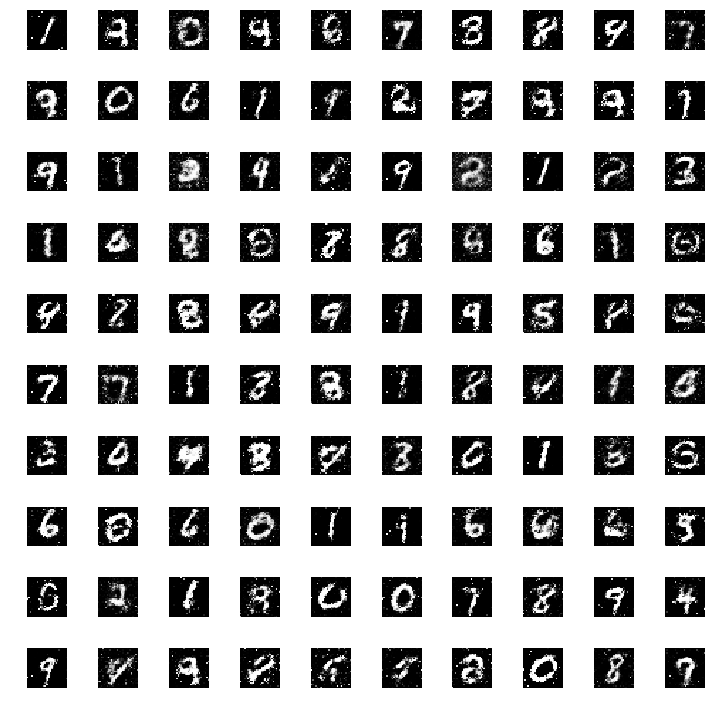

Epoch16 :: Disc Loss 0.6516 -- Gen Loss 0.9997
Epoch17 :: Disc Loss 0.6523 -- Gen Loss 0.9927
Epoch18 :: Disc Loss 0.6542 -- Gen Loss 0.9957
Epoch19 :: Disc Loss 0.6548 -- Gen Loss 0.9927
Epoch20 :: Disc Loss 0.6556 -- Gen Loss 0.9975


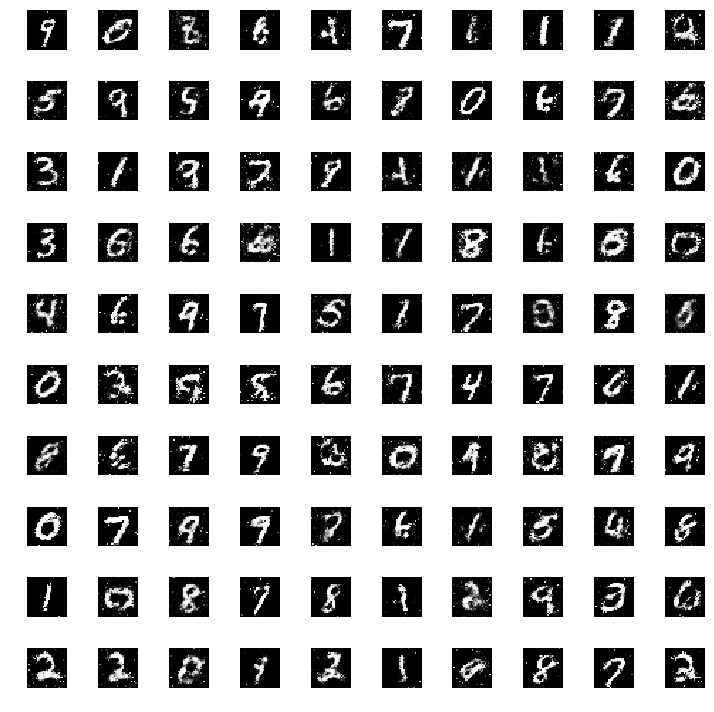

Epoch21 :: Disc Loss 0.6571 -- Gen Loss 0.9919
Epoch22 :: Disc Loss 0.6596 -- Gen Loss 0.9876
Epoch23 :: Disc Loss 0.6584 -- Gen Loss 0.9893
Epoch24 :: Disc Loss 0.6612 -- Gen Loss 0.9850
Epoch25 :: Disc Loss 0.6614 -- Gen Loss 0.9861


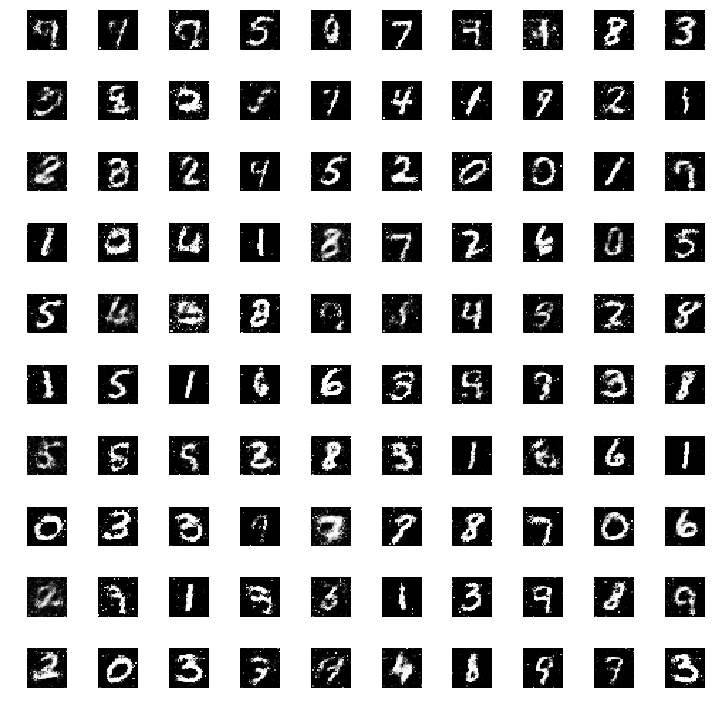

Epoch26 :: Disc Loss 0.6638 -- Gen Loss 0.9763
Epoch27 :: Disc Loss 0.6642 -- Gen Loss 0.9698
Epoch28 :: Disc Loss 0.6650 -- Gen Loss 0.9755
Epoch29 :: Disc Loss 0.6661 -- Gen Loss 0.9725
Epoch30 :: Disc Loss 0.6683 -- Gen Loss 0.9667


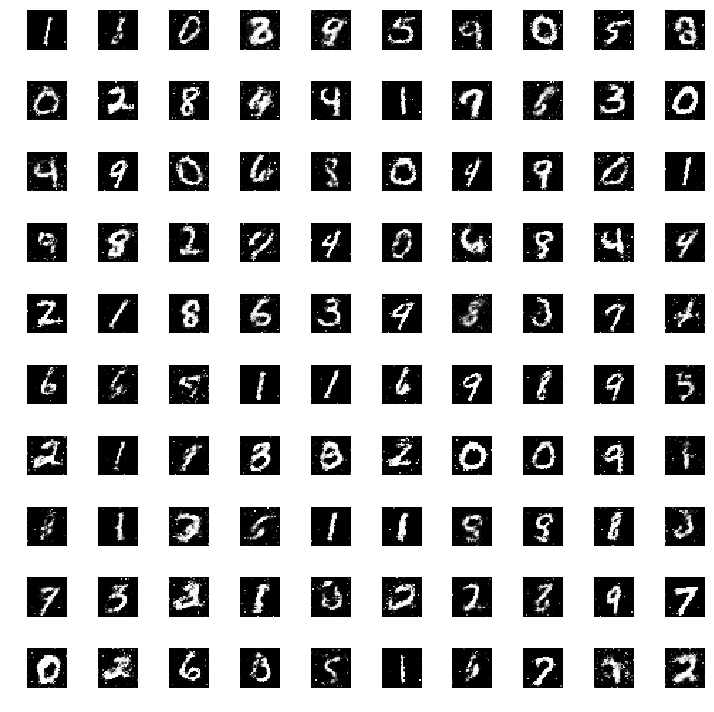

Epoch31 :: Disc Loss 0.6680 -- Gen Loss 0.9671
Epoch32 :: Disc Loss 0.6681 -- Gen Loss 0.9634
Epoch33 :: Disc Loss 0.6703 -- Gen Loss 0.9616
Epoch34 :: Disc Loss 0.6701 -- Gen Loss 0.9650
Epoch35 :: Disc Loss 0.6709 -- Gen Loss 0.9573


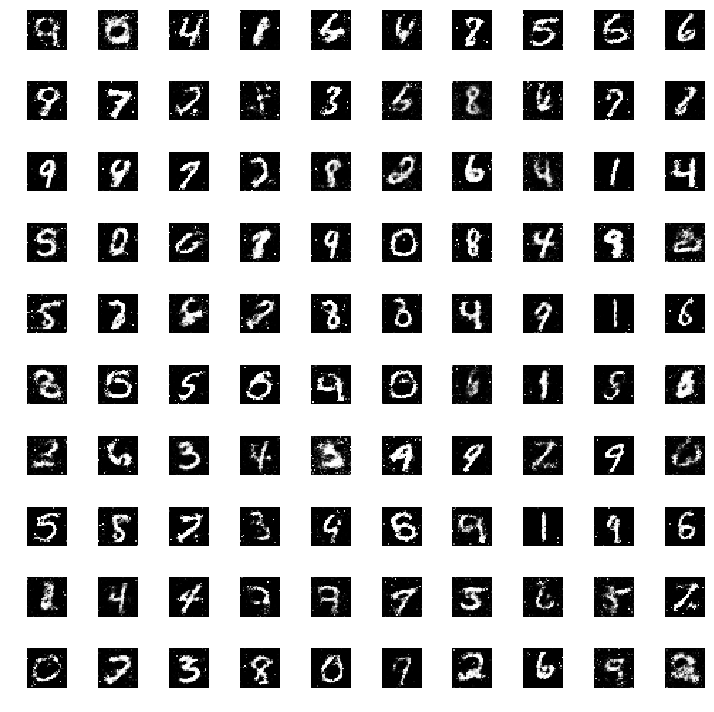

Epoch36 :: Disc Loss 0.6720 -- Gen Loss 0.9635
Epoch37 :: Disc Loss 0.6700 -- Gen Loss 0.9598
Epoch38 :: Disc Loss 0.6710 -- Gen Loss 0.9599
Epoch39 :: Disc Loss 0.6721 -- Gen Loss 0.9556
Epoch40 :: Disc Loss 0.6727 -- Gen Loss 0.9560


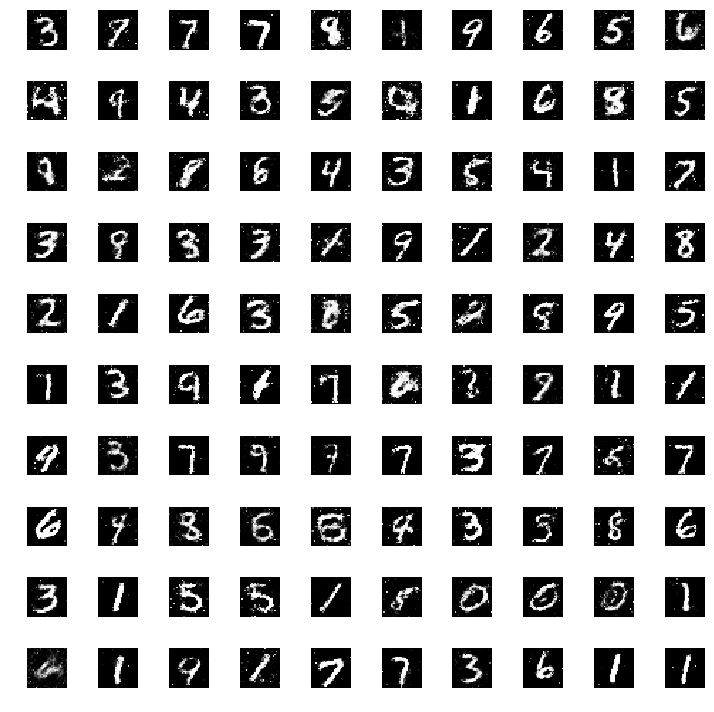

Epoch41 :: Disc Loss 0.6724 -- Gen Loss 0.9608
Epoch42 :: Disc Loss 0.6729 -- Gen Loss 0.9541
Epoch43 :: Disc Loss 0.6724 -- Gen Loss 0.9594
Epoch44 :: Disc Loss 0.6734 -- Gen Loss 0.9506
Epoch45 :: Disc Loss 0.6729 -- Gen Loss 0.9565


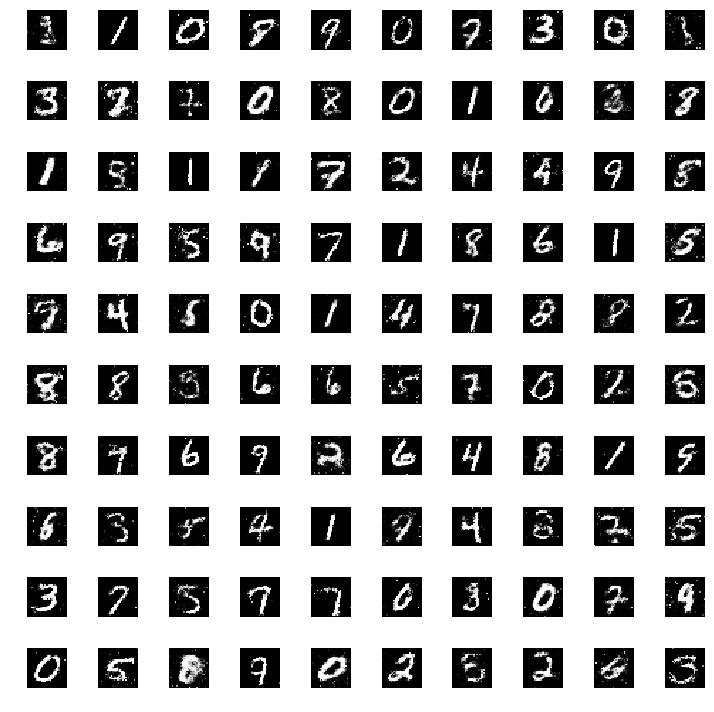

Epoch46 :: Disc Loss 0.6731 -- Gen Loss 0.9559
Epoch47 :: Disc Loss 0.6724 -- Gen Loss 0.9573
Epoch48 :: Disc Loss 0.6724 -- Gen Loss 0.9510
Epoch49 :: Disc Loss 0.6713 -- Gen Loss 0.9560
Epoch50 :: Disc Loss 0.6728 -- Gen Loss 0.9547


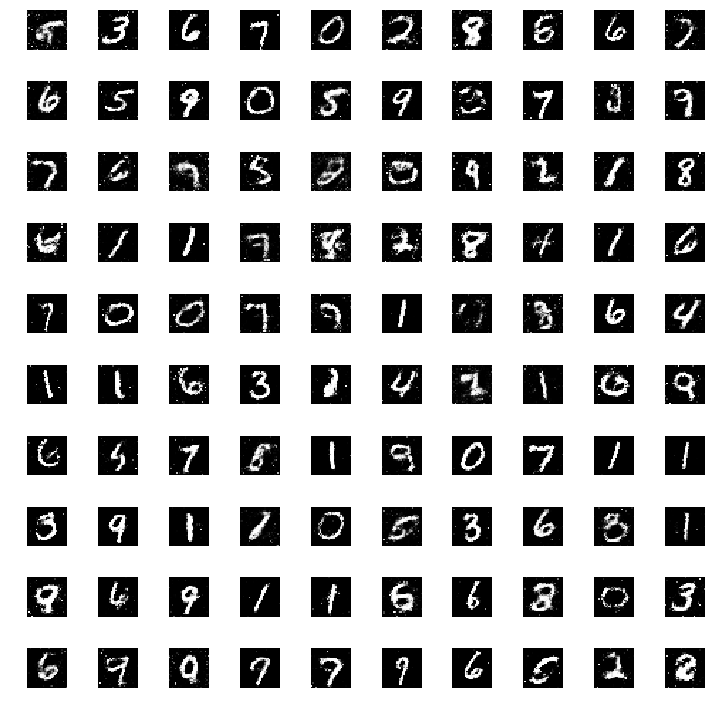

In [12]:
## TRAINING LOOP
d_losses = []
g_losses = []

for epoch in range(TOTAL_EPOCHS):
    
    disc_loss = 0.
    gen_loss = 0.
    
    ## Mini batch SGD
    for step in range(NO_OF_BATCHES):
        
        ## Step-1 Training the Discriminator
        ## 50% real data, 50% fake data
        
        ## REAL DATA
        idx = np.random.randint(0,X_train.shape[0],HALF_BATCH)  ## randint(low,high,no_of_numbers)
        real_imgs = X_train[idx]                                ## real images corr to the real indices
        
        ## FAKE DATA
        noise = np.random.normal(0,1,size=(HALF_BATCH,NOISE_DIM))   ## Gaussian distributed Noise vector
        fake_imgs = generator.predict(noise)                        ## generating a fake img out of noise
        
        ## LABELS for real and fake imgs
        real_y = np.ones((HALF_BATCH,1))*0.9      ## 90% sure that real ones are reals...one sided label smoothing
        fake_y = np.zeros((HALF_BATCH,1))
        
        ## Train the Discriminator
        disc_loss_real = discriminator.train_on_batch(real_imgs, real_y)
        disc_loss_fake = discriminator.train_on_batch(fake_imgs, fake_y)
        
        disc_loss += (disc_loss_fake + disc_loss_real)/2             ## equally weighted total loss for full epoch
        
        ## Training the Generator, Step-2, Frozen Discriminator
        noise = np.random.normal(0,1,size=(BATCH_SIZE,NOISE_DIM))    ## complete 256 imgs
        grnd_truth_y = np.ones((BATCH_SIZE,1))
        gen_loss += model.train_on_batch(noise, grnd_truth_y)
        
    print("Epoch%d :: Disc Loss %.4f -- Gen Loss %.4f" %((epoch+1),disc_loss/NO_OF_BATCHES,gen_loss/NO_OF_BATCHES))
    d_losses.append(disc_loss/NO_OF_BATCHES)
    g_losses.append(gen_loss/NO_OF_BATCHES)
    
    if (epoch+1)%5 == 0:
        generator.save('./model/gan_generator{0}.h5'.format(epoch+1))
        save_imgs(epoch)

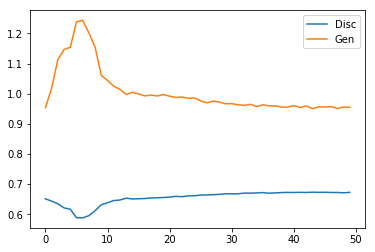

In [13]:
plt.plot(d_losses,label='Disc')
plt.plot(g_losses,label='Gen')
plt.legend()
plt.show()